In [1]:

import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df = pd.read_csv('/kaggle/input/banking-retention-prediction/Churn_Modelling.csv')
#df
# df.head()
# df.shape

/kaggle/input/banking-retention-prediction/Churn_Modelling.csv


In [2]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [6]:
for col in df.columns:
    print(f"Value counts for column '{col}':")
    print(df[col].value_counts())
    print()

Value counts for column 'RowNumber':
RowNumber
1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: count, Length: 10000, dtype: int64

Value counts for column 'CustomerId':
CustomerId
15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: count, Length: 10000, dtype: int64

Value counts for column 'Surname':
Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64

Value counts for column 'CreditScore':
CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: count, Length: 460, dtype: int64

Value counts for column 'Geography':
Geography
France     5014
Germany    2509
Spain

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='CreditScore', ylabel='Count'>

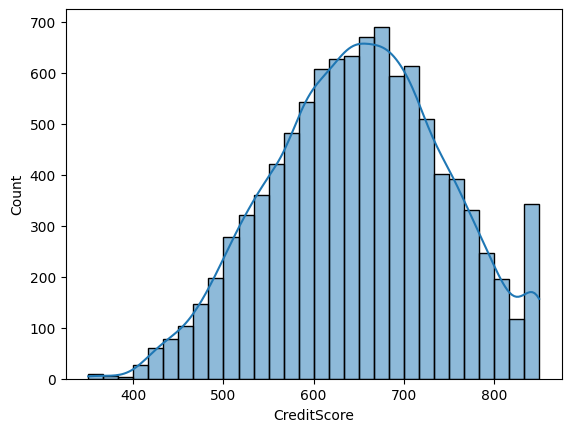

In [7]:
import seaborn as sns
sns.histplot(df['CreditScore'],kde = True,bins = 30)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='CustomerId', ylabel='Count'>

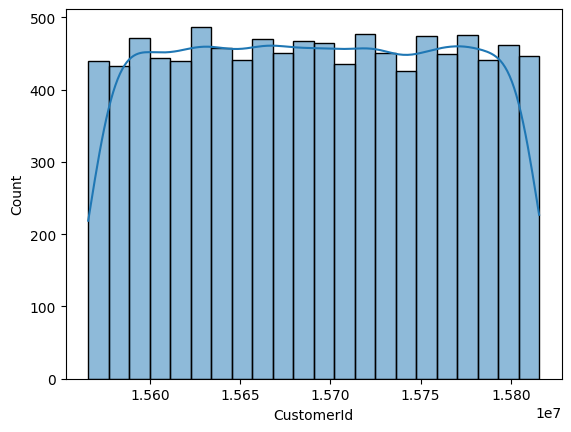

In [8]:
sns.histplot(df['CustomerId'],kde = True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

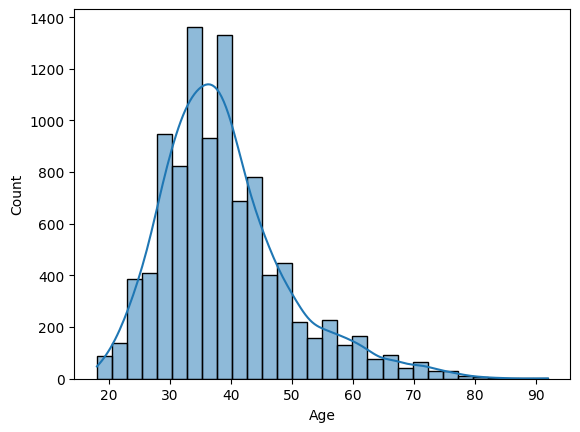

In [9]:
sns.histplot(df['Age'],kde = True,bins=30)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='RowNumber', ylabel='Count'>

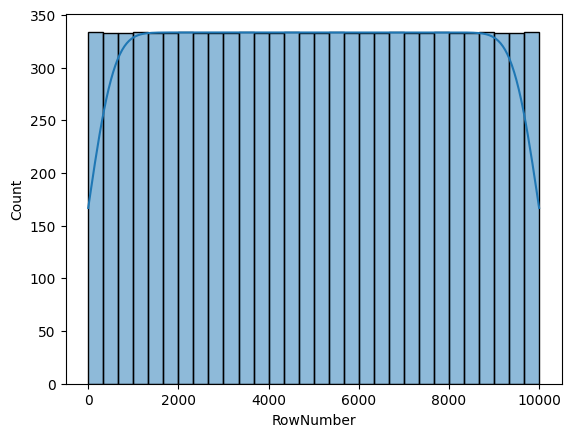

In [10]:
sns.histplot(df['RowNumber'],kde = True,bins = 30)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Tenure', ylabel='Count'>

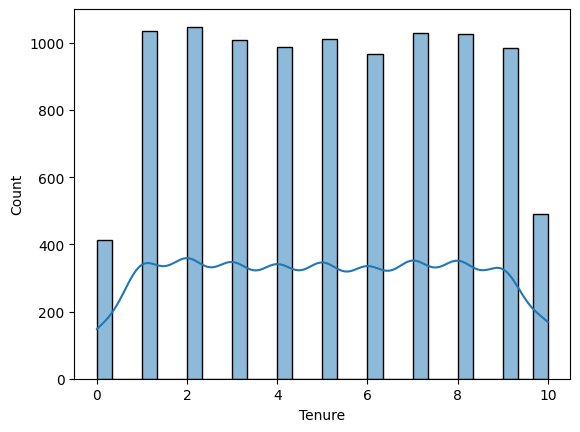

In [11]:
sns.histplot(df['Tenure'],kde = True,bins = 30)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Balance', ylabel='Count'>

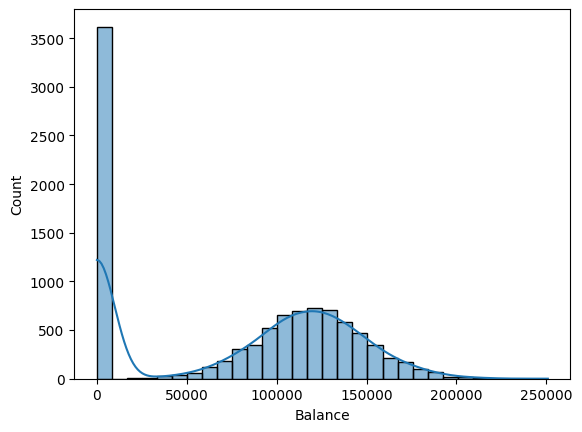

In [12]:
sns.histplot(df['Balance'],kde = True,bins = 30)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='NumOfProducts', ylabel='Count'>

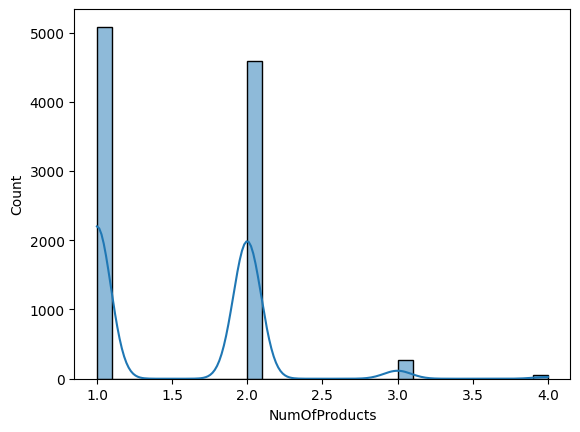

In [13]:
sns.histplot(df['NumOfProducts'],kde = True,bins = 30)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='HasCrCard', ylabel='Count'>

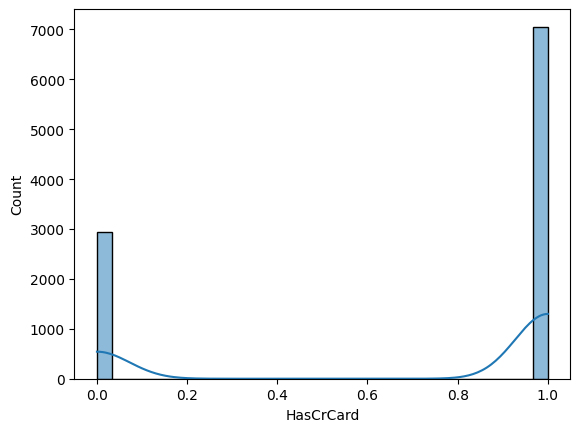

In [14]:
sns.histplot(df['HasCrCard'],kde = True,bins = 30)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='IsActiveMember', ylabel='Count'>

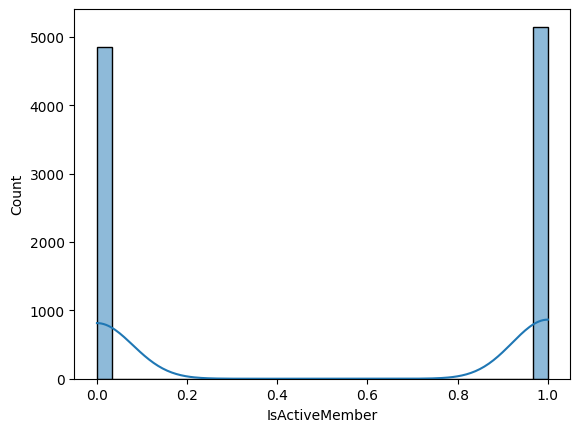

In [15]:
sns.histplot(df['IsActiveMember'],kde = True,bins = 30)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='EstimatedSalary', ylabel='Count'>

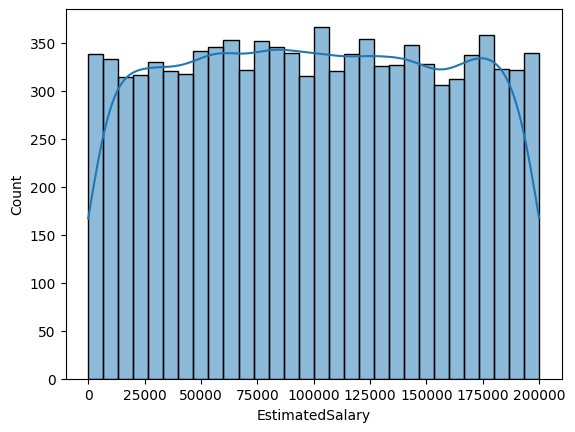

In [16]:
sns.histplot(df['EstimatedSalary'],kde = True,bins = 30)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Exited', ylabel='Count'>

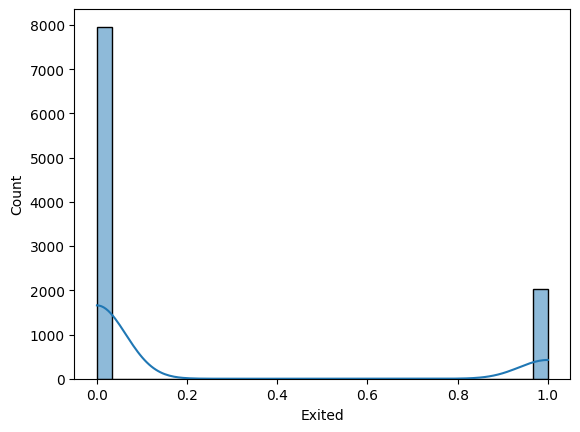

In [17]:
sns.histplot(df['Exited'],kde = True,bins = 30)

<Axes: xlabel='Gender', ylabel='count'>

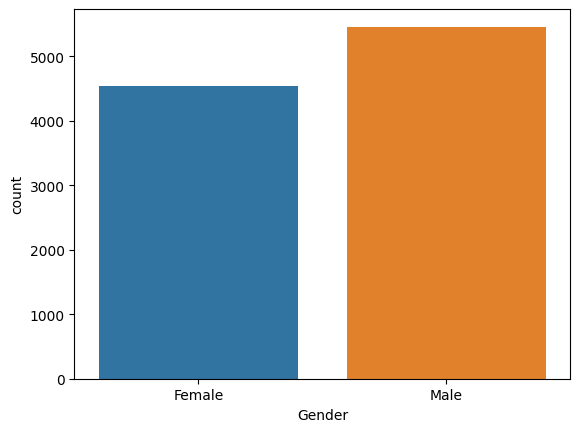

In [18]:

sns.countplot(x = df['Gender'])

<Axes: xlabel='Surname', ylabel='count'>

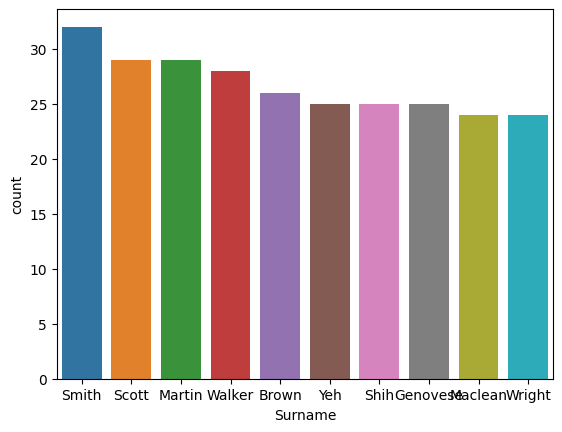

In [19]:
sns.countplot(x='Surname', data=df, order=df['Surname'].value_counts().iloc[:10].index)

<Axes: xlabel='Geography', ylabel='count'>

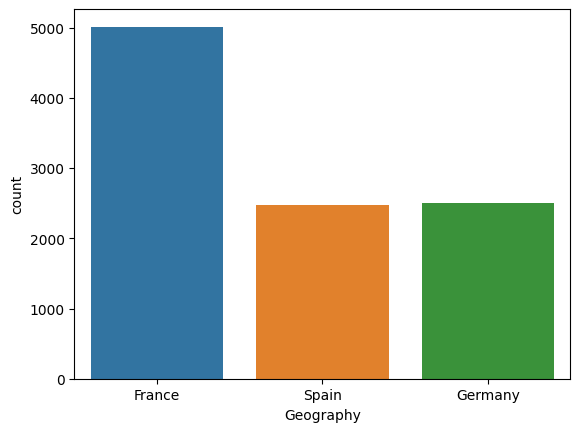

In [20]:
sns.countplot(x = df['Geography'])

<Axes: xlabel='Exited', ylabel='RowNumber'>

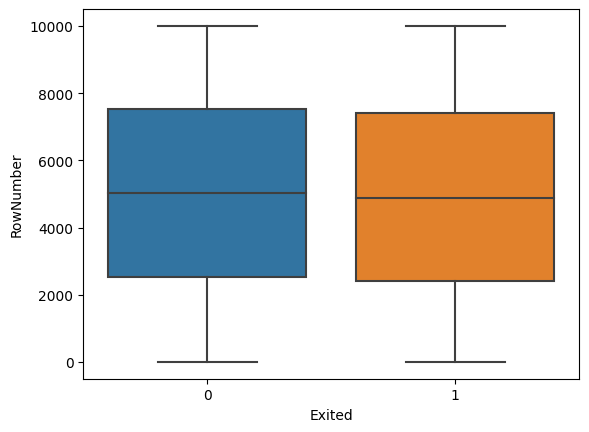

In [21]:

sns.boxplot(x='Exited',y='RowNumber',data = df)

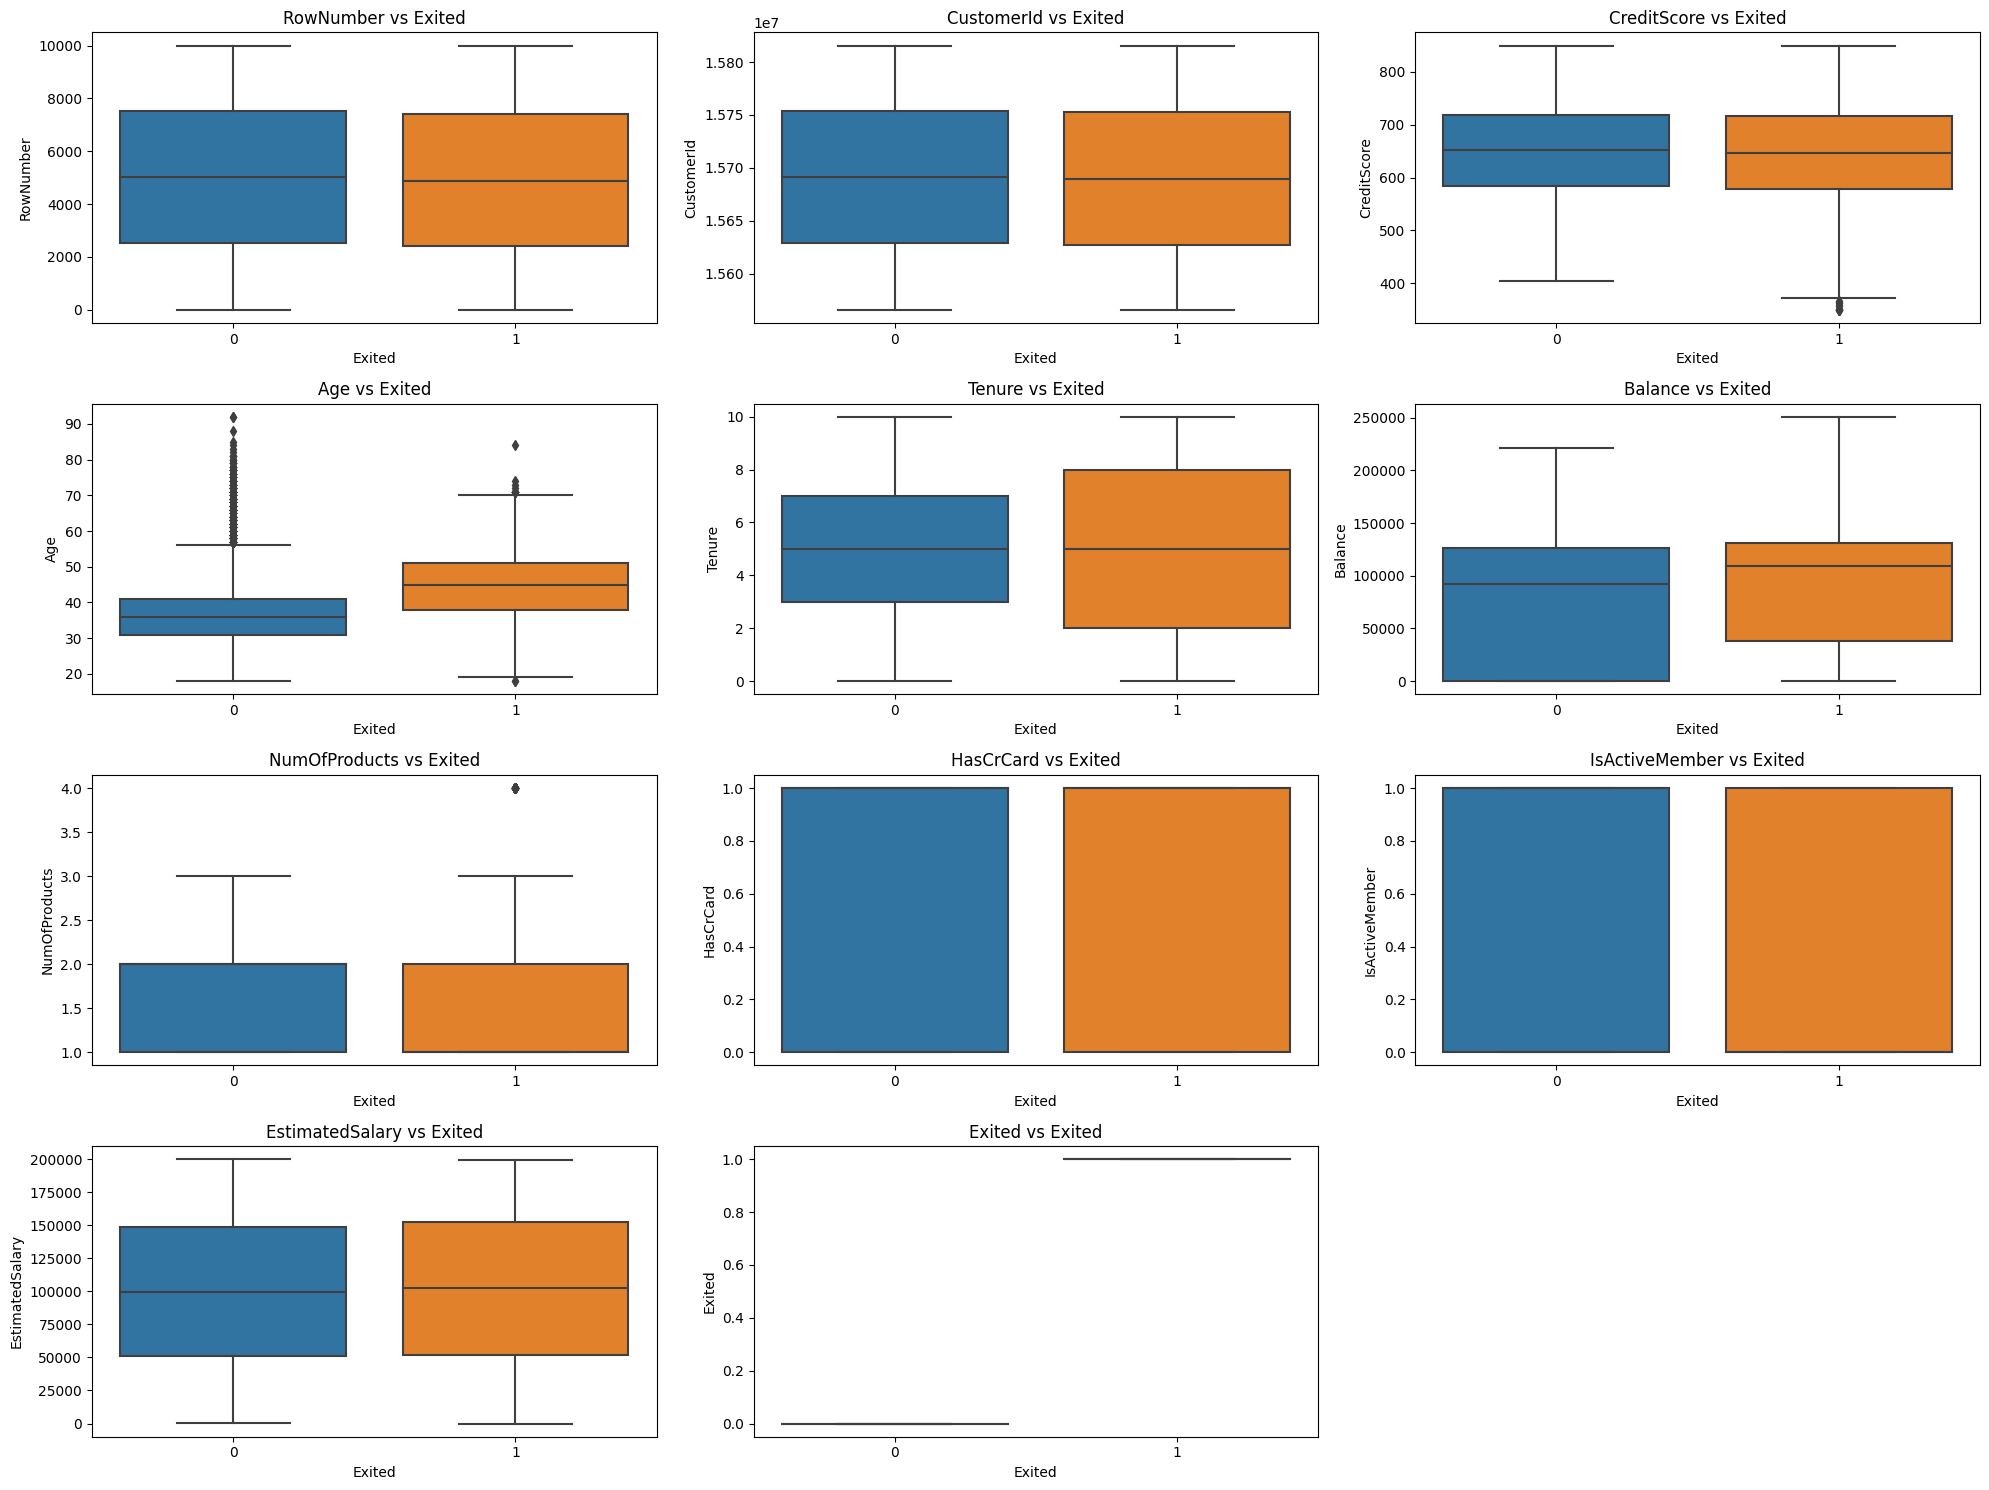

In [22]:
import matplotlib.pyplot as plt
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
target = 'Exited'

plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=target, y=col, data=df)
    plt.title(f'{col} vs {target}')
plt.tight_layout()
plt.show()

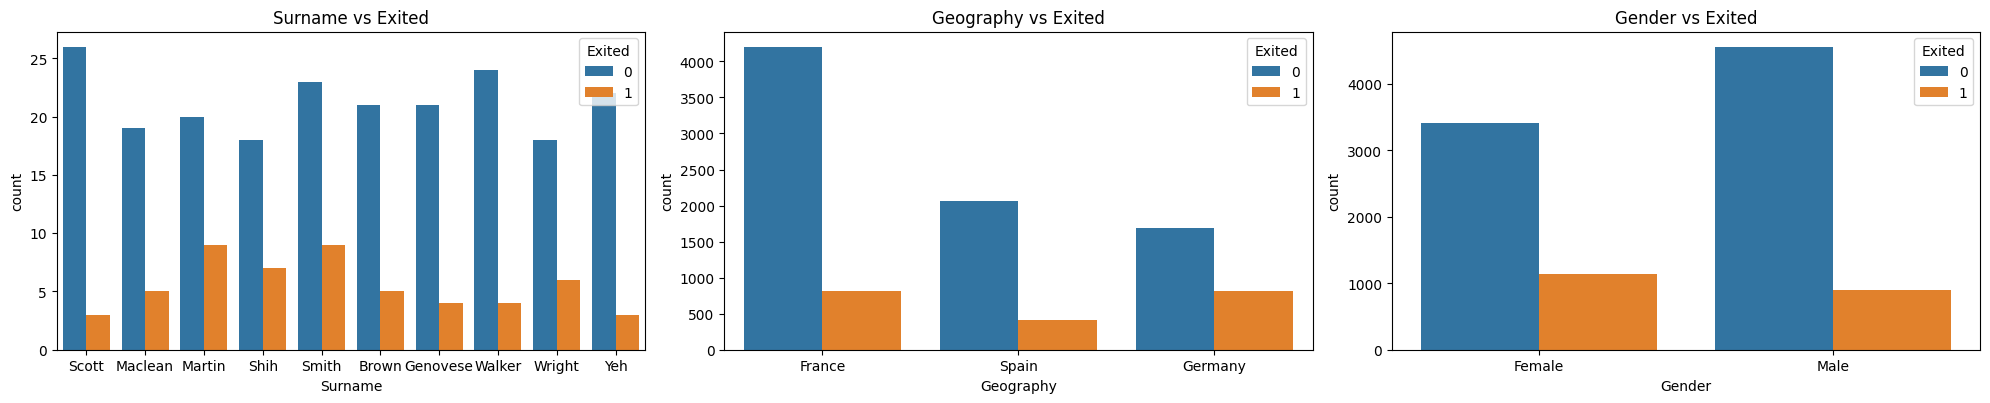

In [23]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)
    top_10_values = df[col].value_counts().nlargest(10).index
    sns.countplot(x=col, hue=target, data=df[df[col].isin(top_10_values)])
    plt.title(f'{col} vs {target}')
    plt.legend(title=target)
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

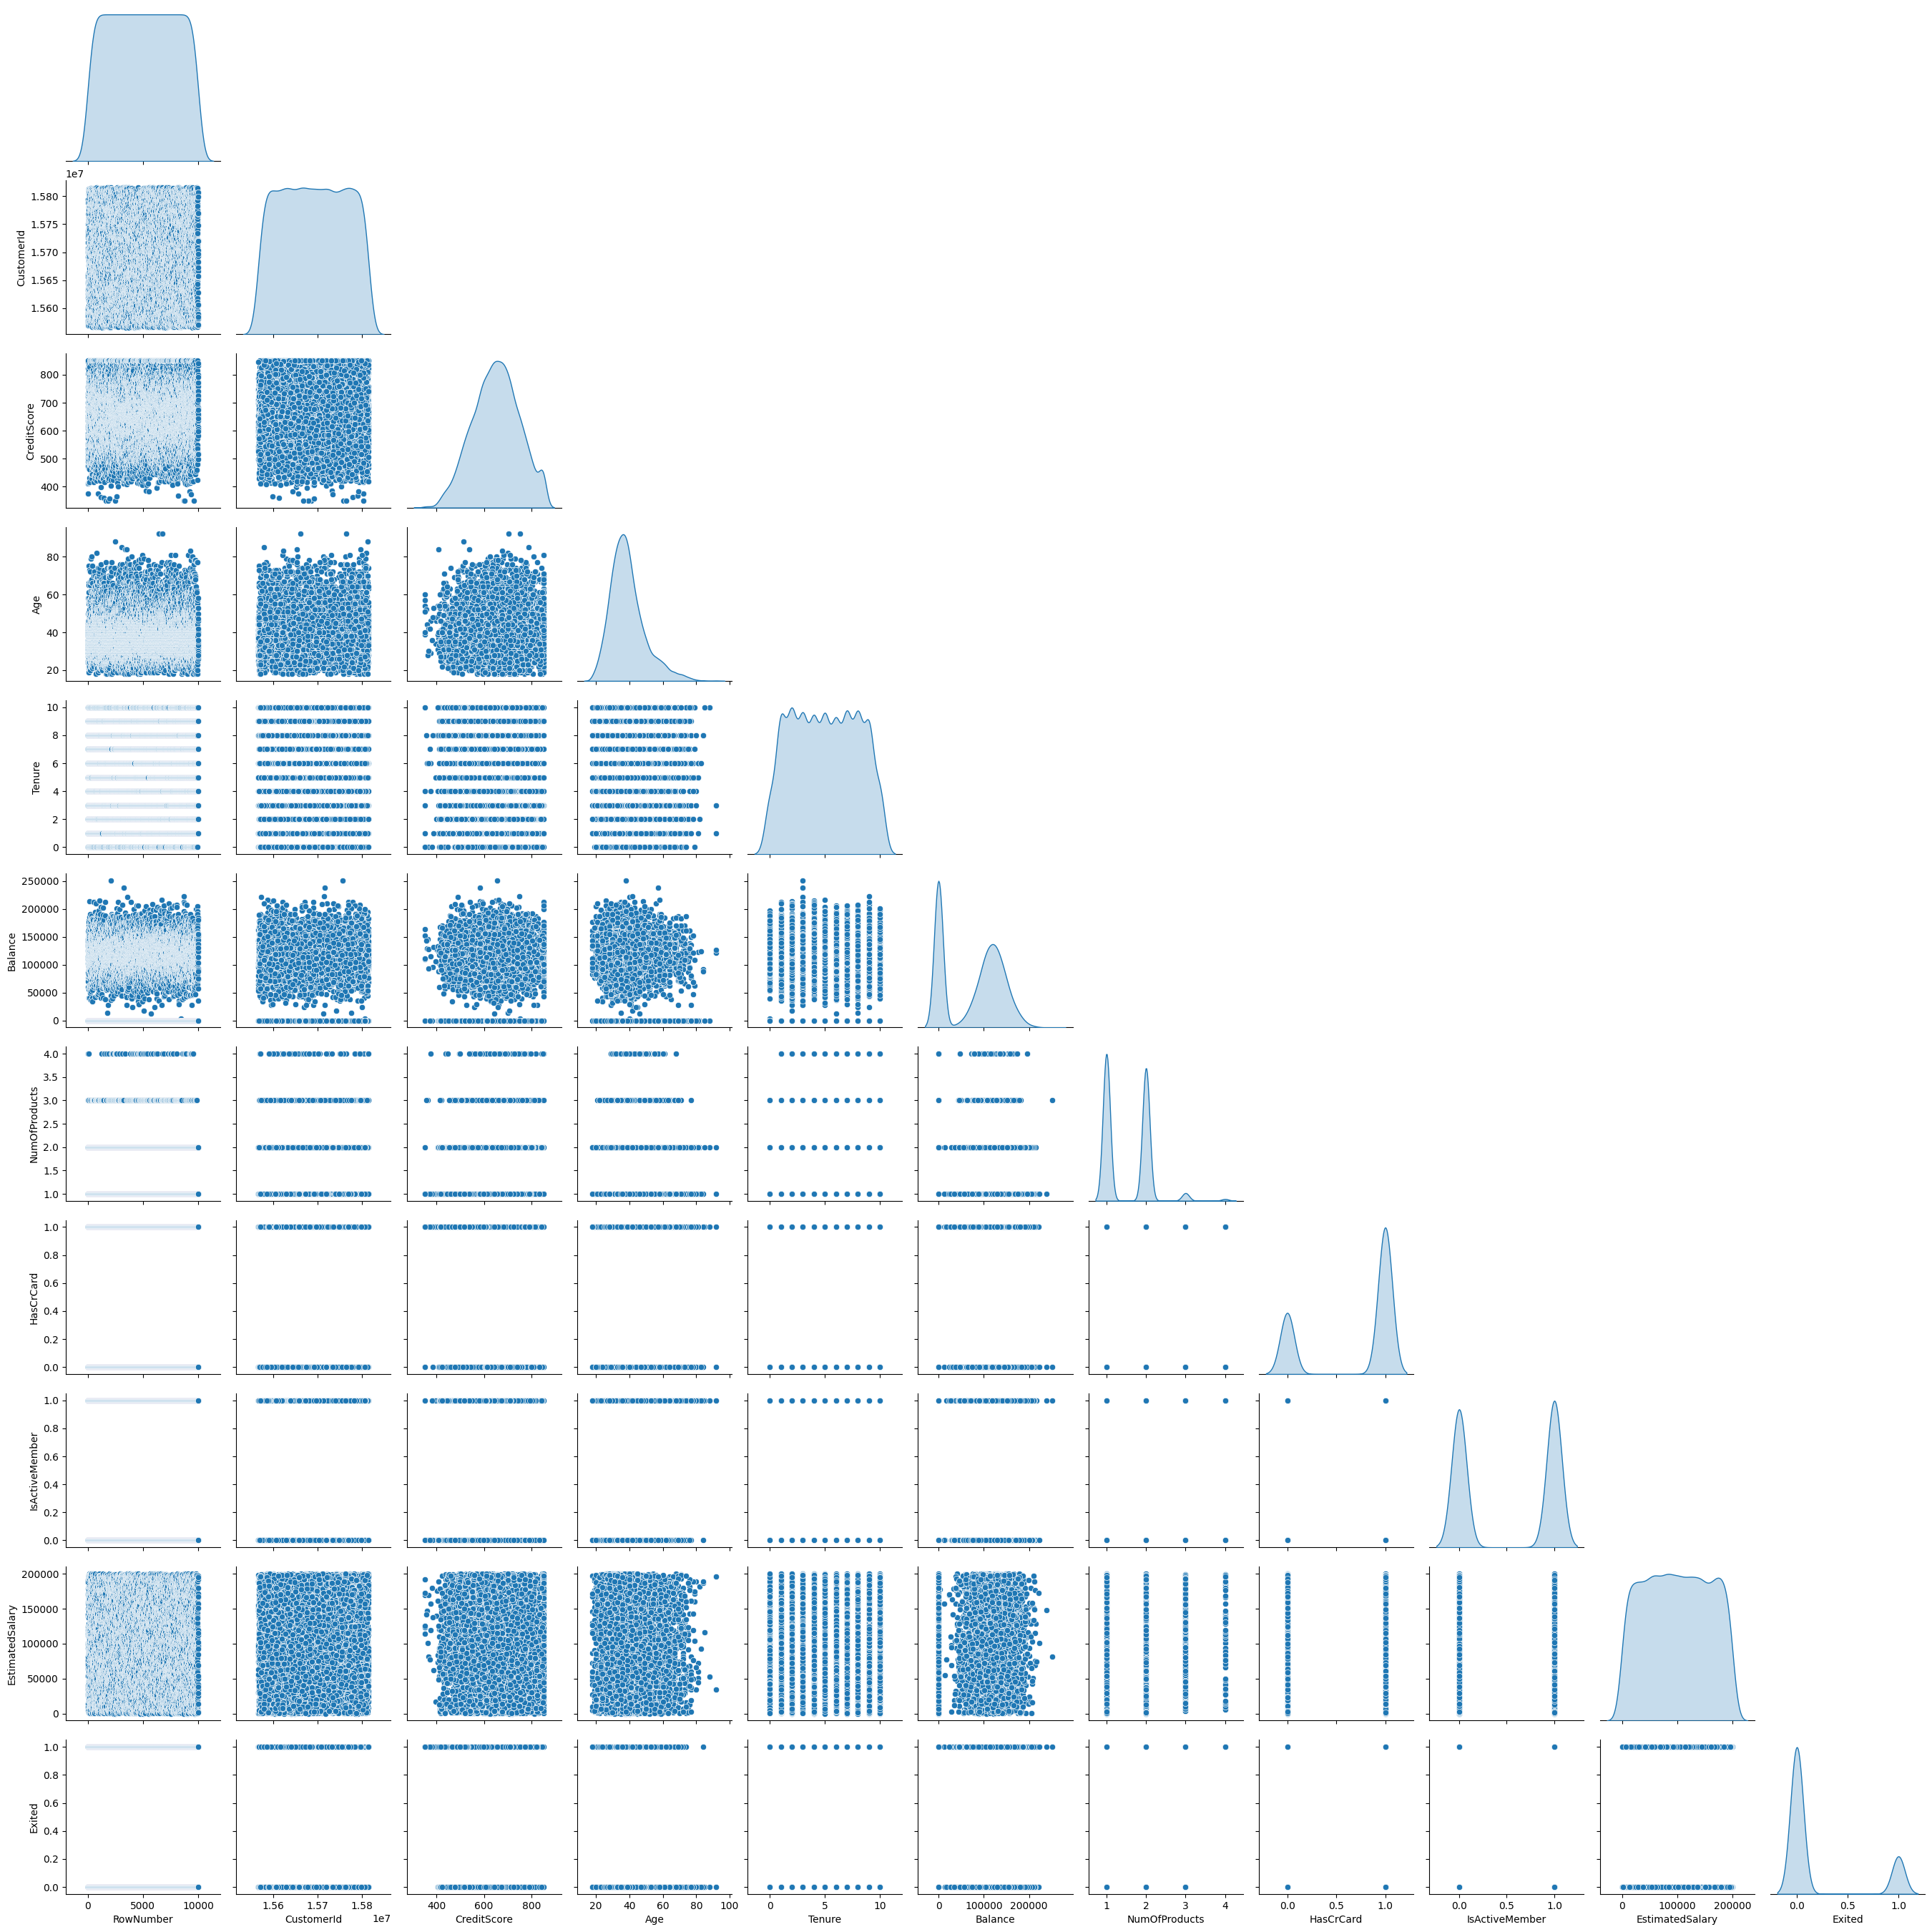

In [24]:
sns.pairplot(df[numerical_columns], diag_kind='kde', corner=True)
plt.show()

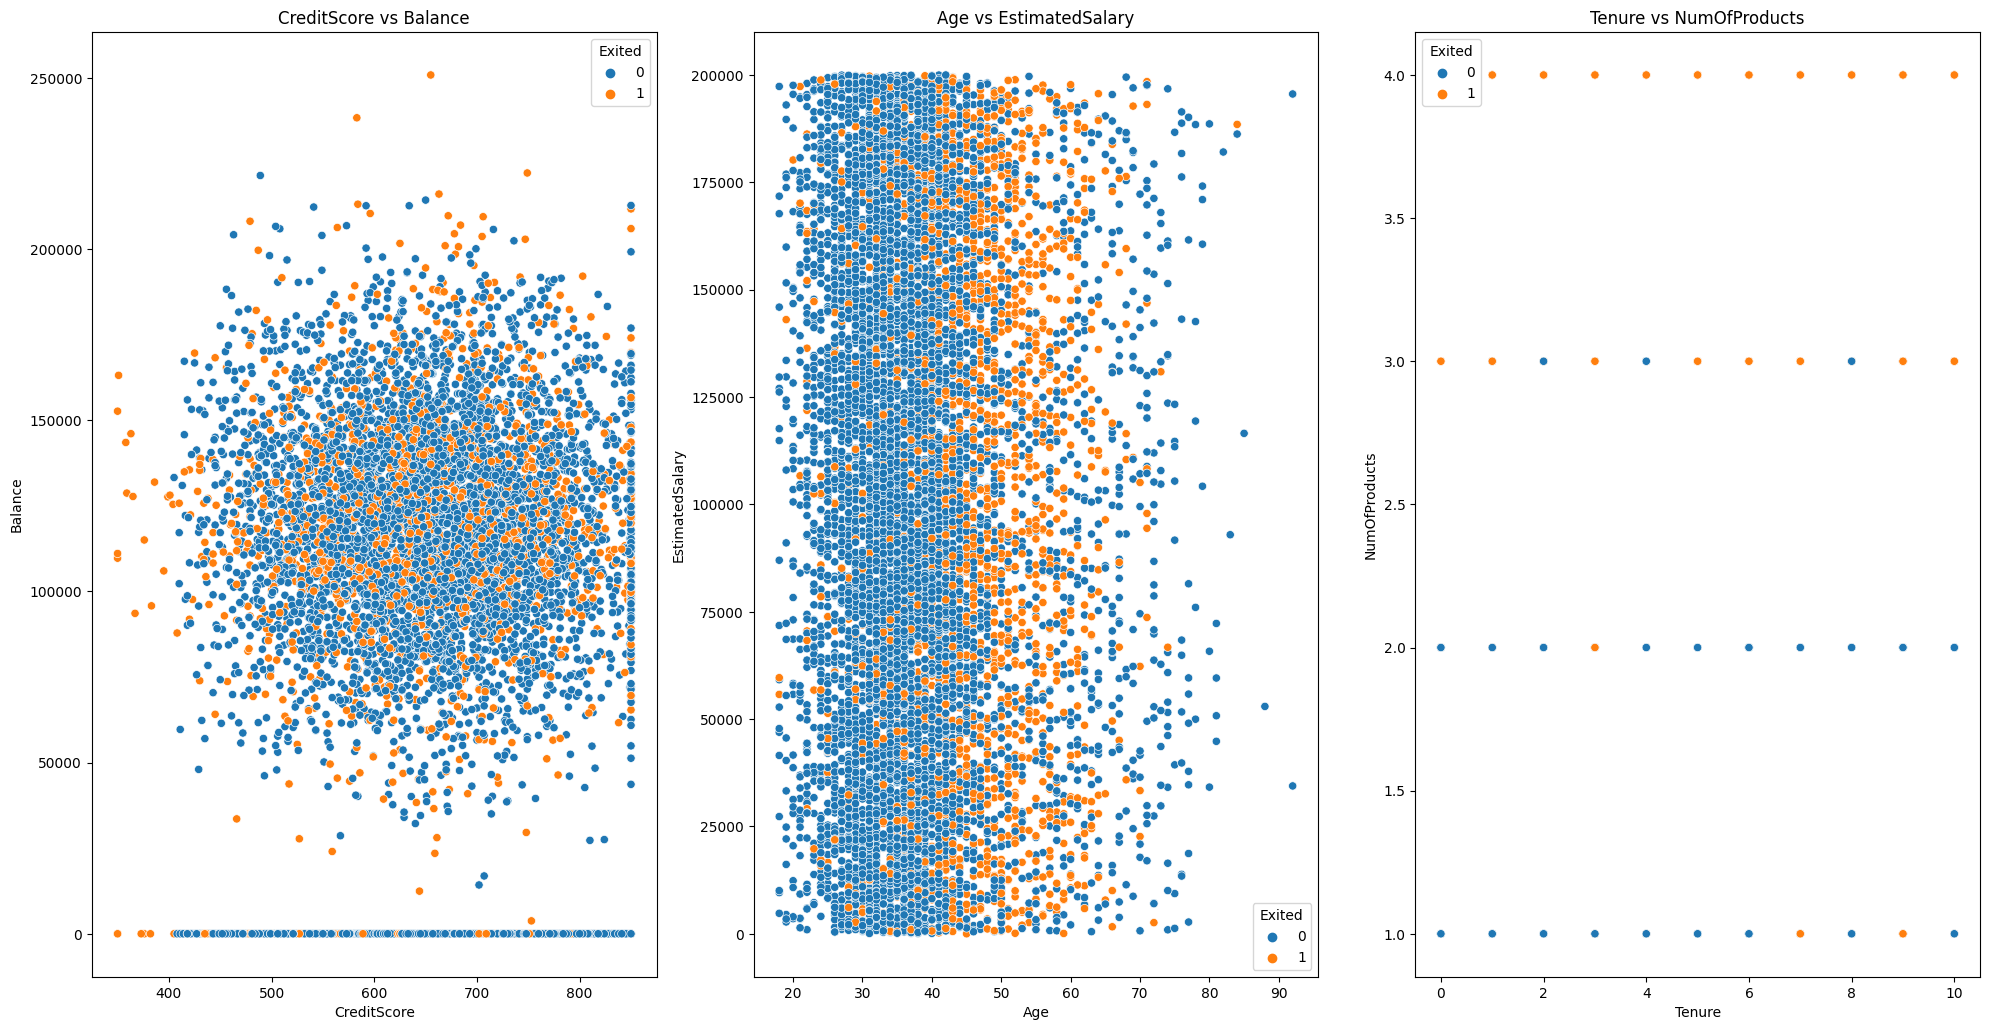

In [25]:
plt.figure(figsize=(20, 20))
pairs = [('CreditScore', 'Balance'), ('Age', 'EstimatedSalary'), ('Tenure', 'NumOfProducts')]
for i, (col1, col2) in enumerate(pairs, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=col1, y=col2, hue=target, data=df)
    plt.title(f'{col1} vs {col2}')
plt.tight_layout()
plt.show()

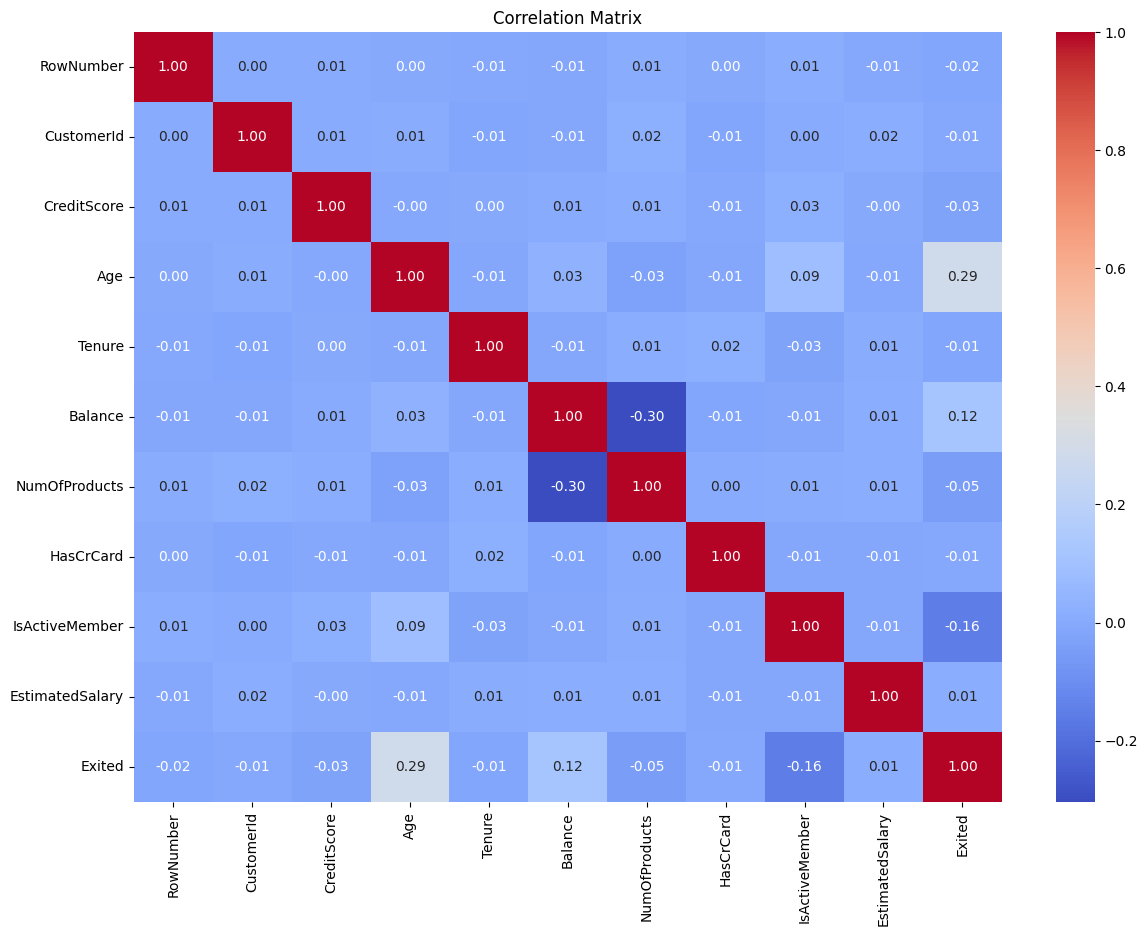

In [26]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


/tmp/ipykernel_18/864395269.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_age_group = df.groupby('AgeGroup')['Exited'].mean().reset_index()
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


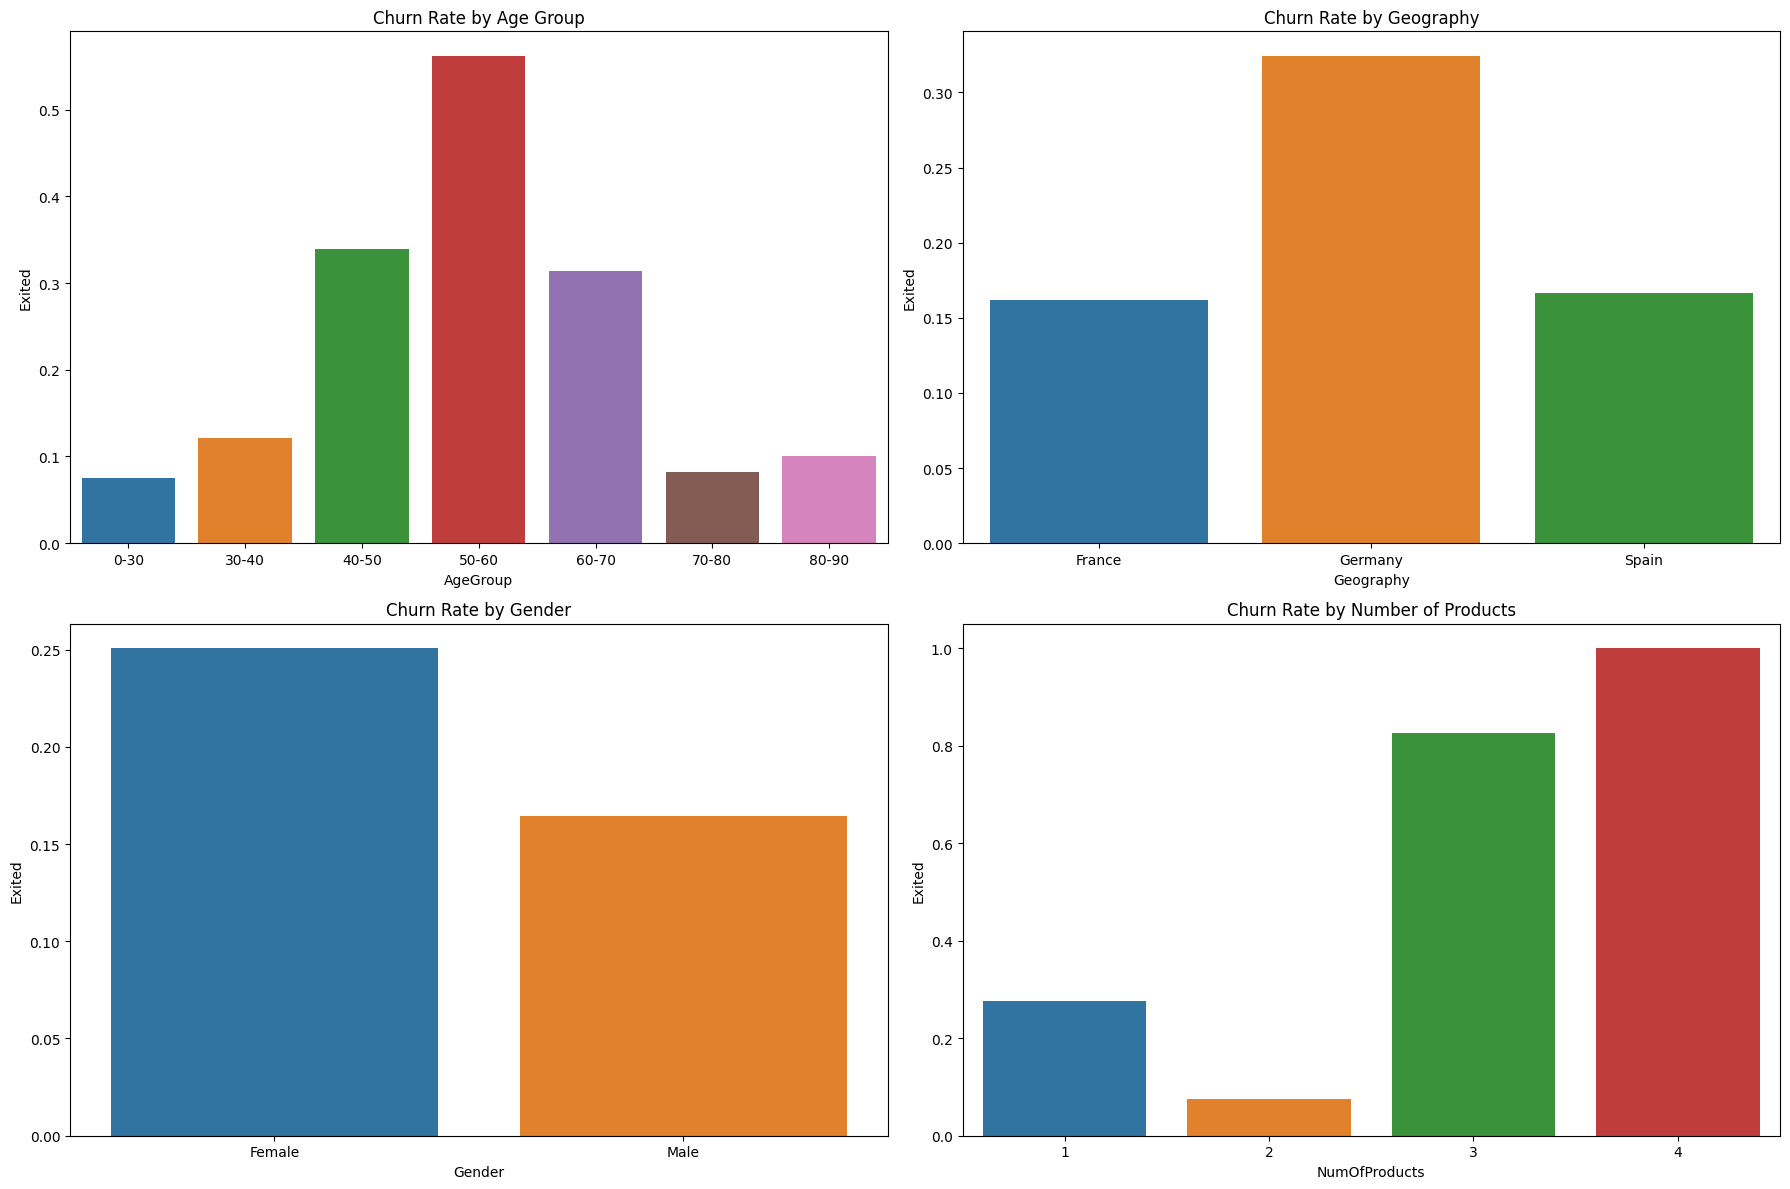

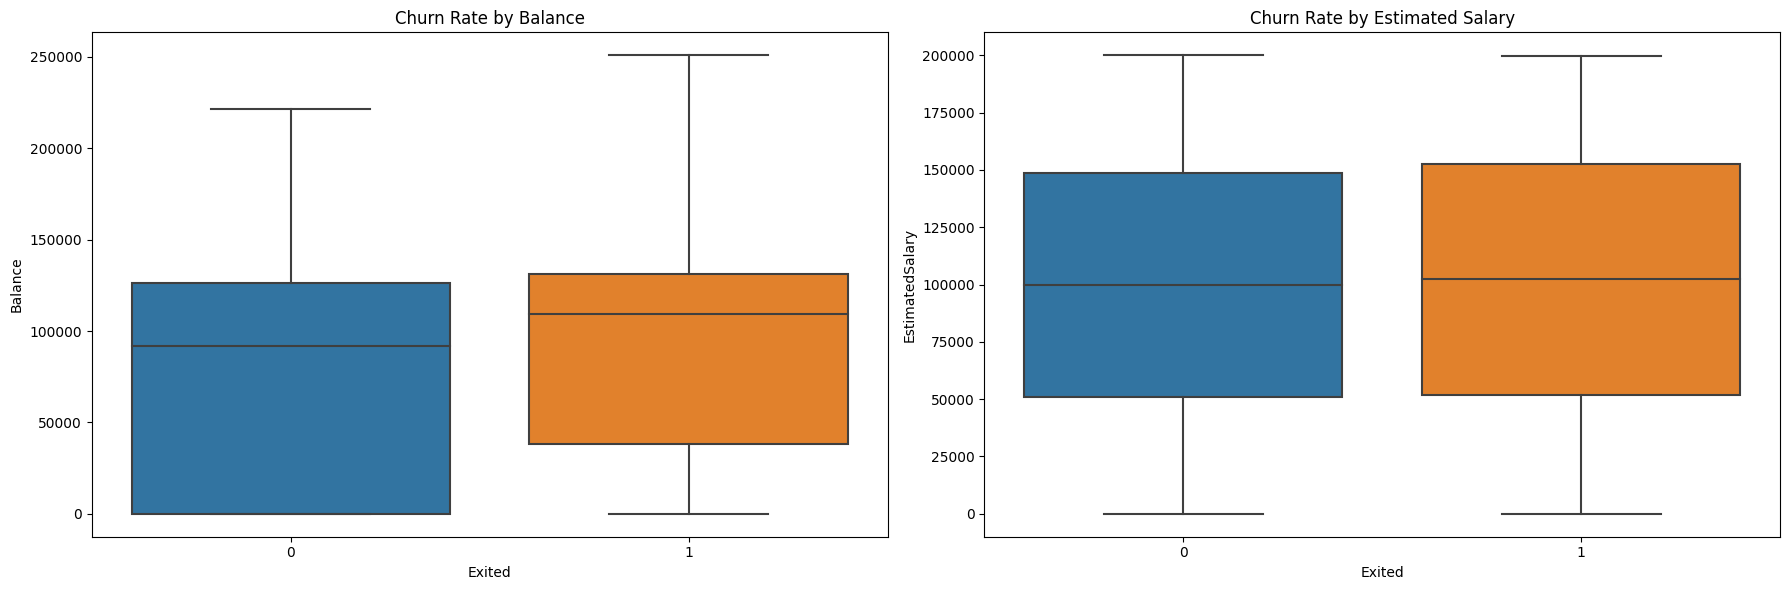

In [27]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, 70, 80, 90], labels=['0-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])

churn_by_age_group = df.groupby('AgeGroup')['Exited'].mean().reset_index()
churn_by_geography = df.groupby('Geography')['Exited'].mean().reset_index()
churn_by_gender = df.groupby('Gender')['Exited'].mean().reset_index()
churn_by_products = df.groupby('NumOfProducts')['Exited'].mean().reset_index()

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

sns.barplot(data=churn_by_age_group, x='AgeGroup', y='Exited', ax=axes[0, 0])
axes[0, 0].set_title('Churn Rate by Age Group')

sns.barplot(data=churn_by_geography, x='Geography', y='Exited', ax=axes[0, 1])
axes[0, 1].set_title('Churn Rate by Geography')

sns.barplot(data=churn_by_gender, x='Gender', y='Exited', ax=axes[1, 0])
axes[1, 0].set_title('Churn Rate by Gender')

sns.barplot(data=churn_by_products, x='NumOfProducts', y='Exited', ax=axes[1, 1])
axes[1, 1].set_title('Churn Rate by Number of Products')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.boxplot(data=df, x='Exited', y='Balance', ax=axes[0])
axes[0].set_title('Churn Rate by Balance')

sns.boxplot(data=df, x='Exited', y='EstimatedSalary', ax=axes[1])
axes[1].set_title('Churn Rate by Estimated Salary')

plt.tight_layout()
plt.show()

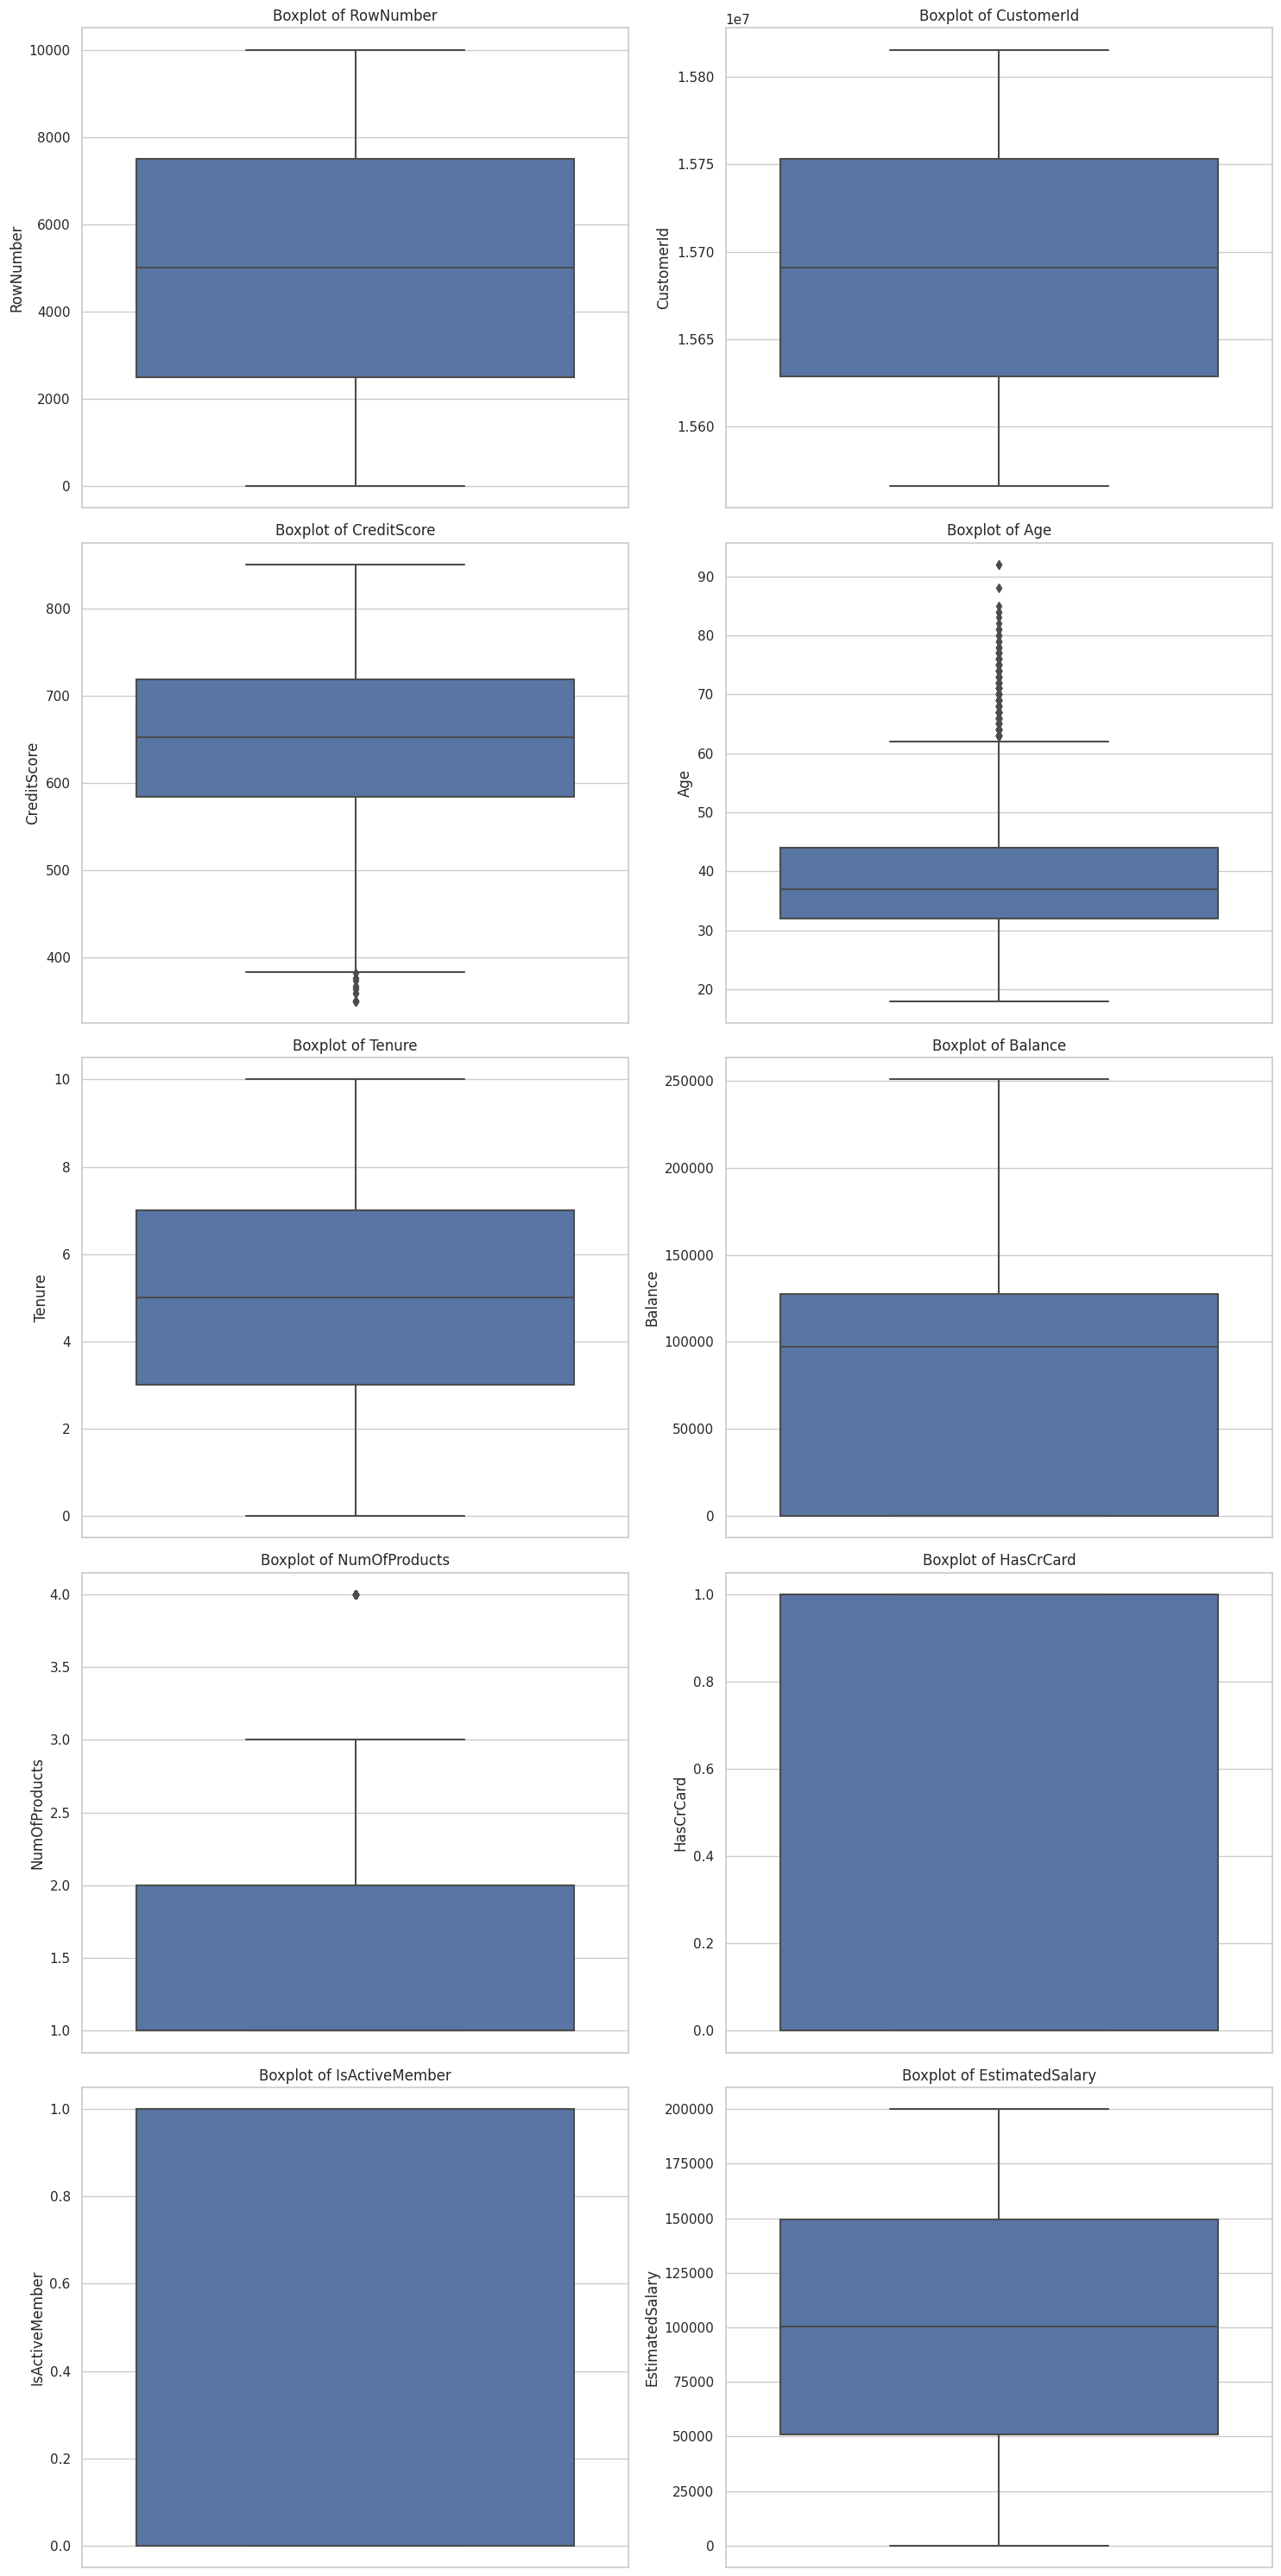

In [28]:
sns.set_theme(style="whitegrid")

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns.drop('Exited')

fig, axes = plt.subplots(nrows=(len(numeric_columns) + 1) // 2, ncols=2, figsize=(15, len(numeric_columns) * 3))

axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(data=df, y=column, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel('')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [29]:
def cap_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    column = column.apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    return column

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = np.delete(numeric_columns, np.where(numeric_columns == 'Exited'))

outlier_columns = []
for col in numeric_columns:
    capped_column = cap_outliers_iqr(df[col])
    if not capped_column.equals(df[col]):
        outlier_columns.append(col)
    df[col] = capped_column

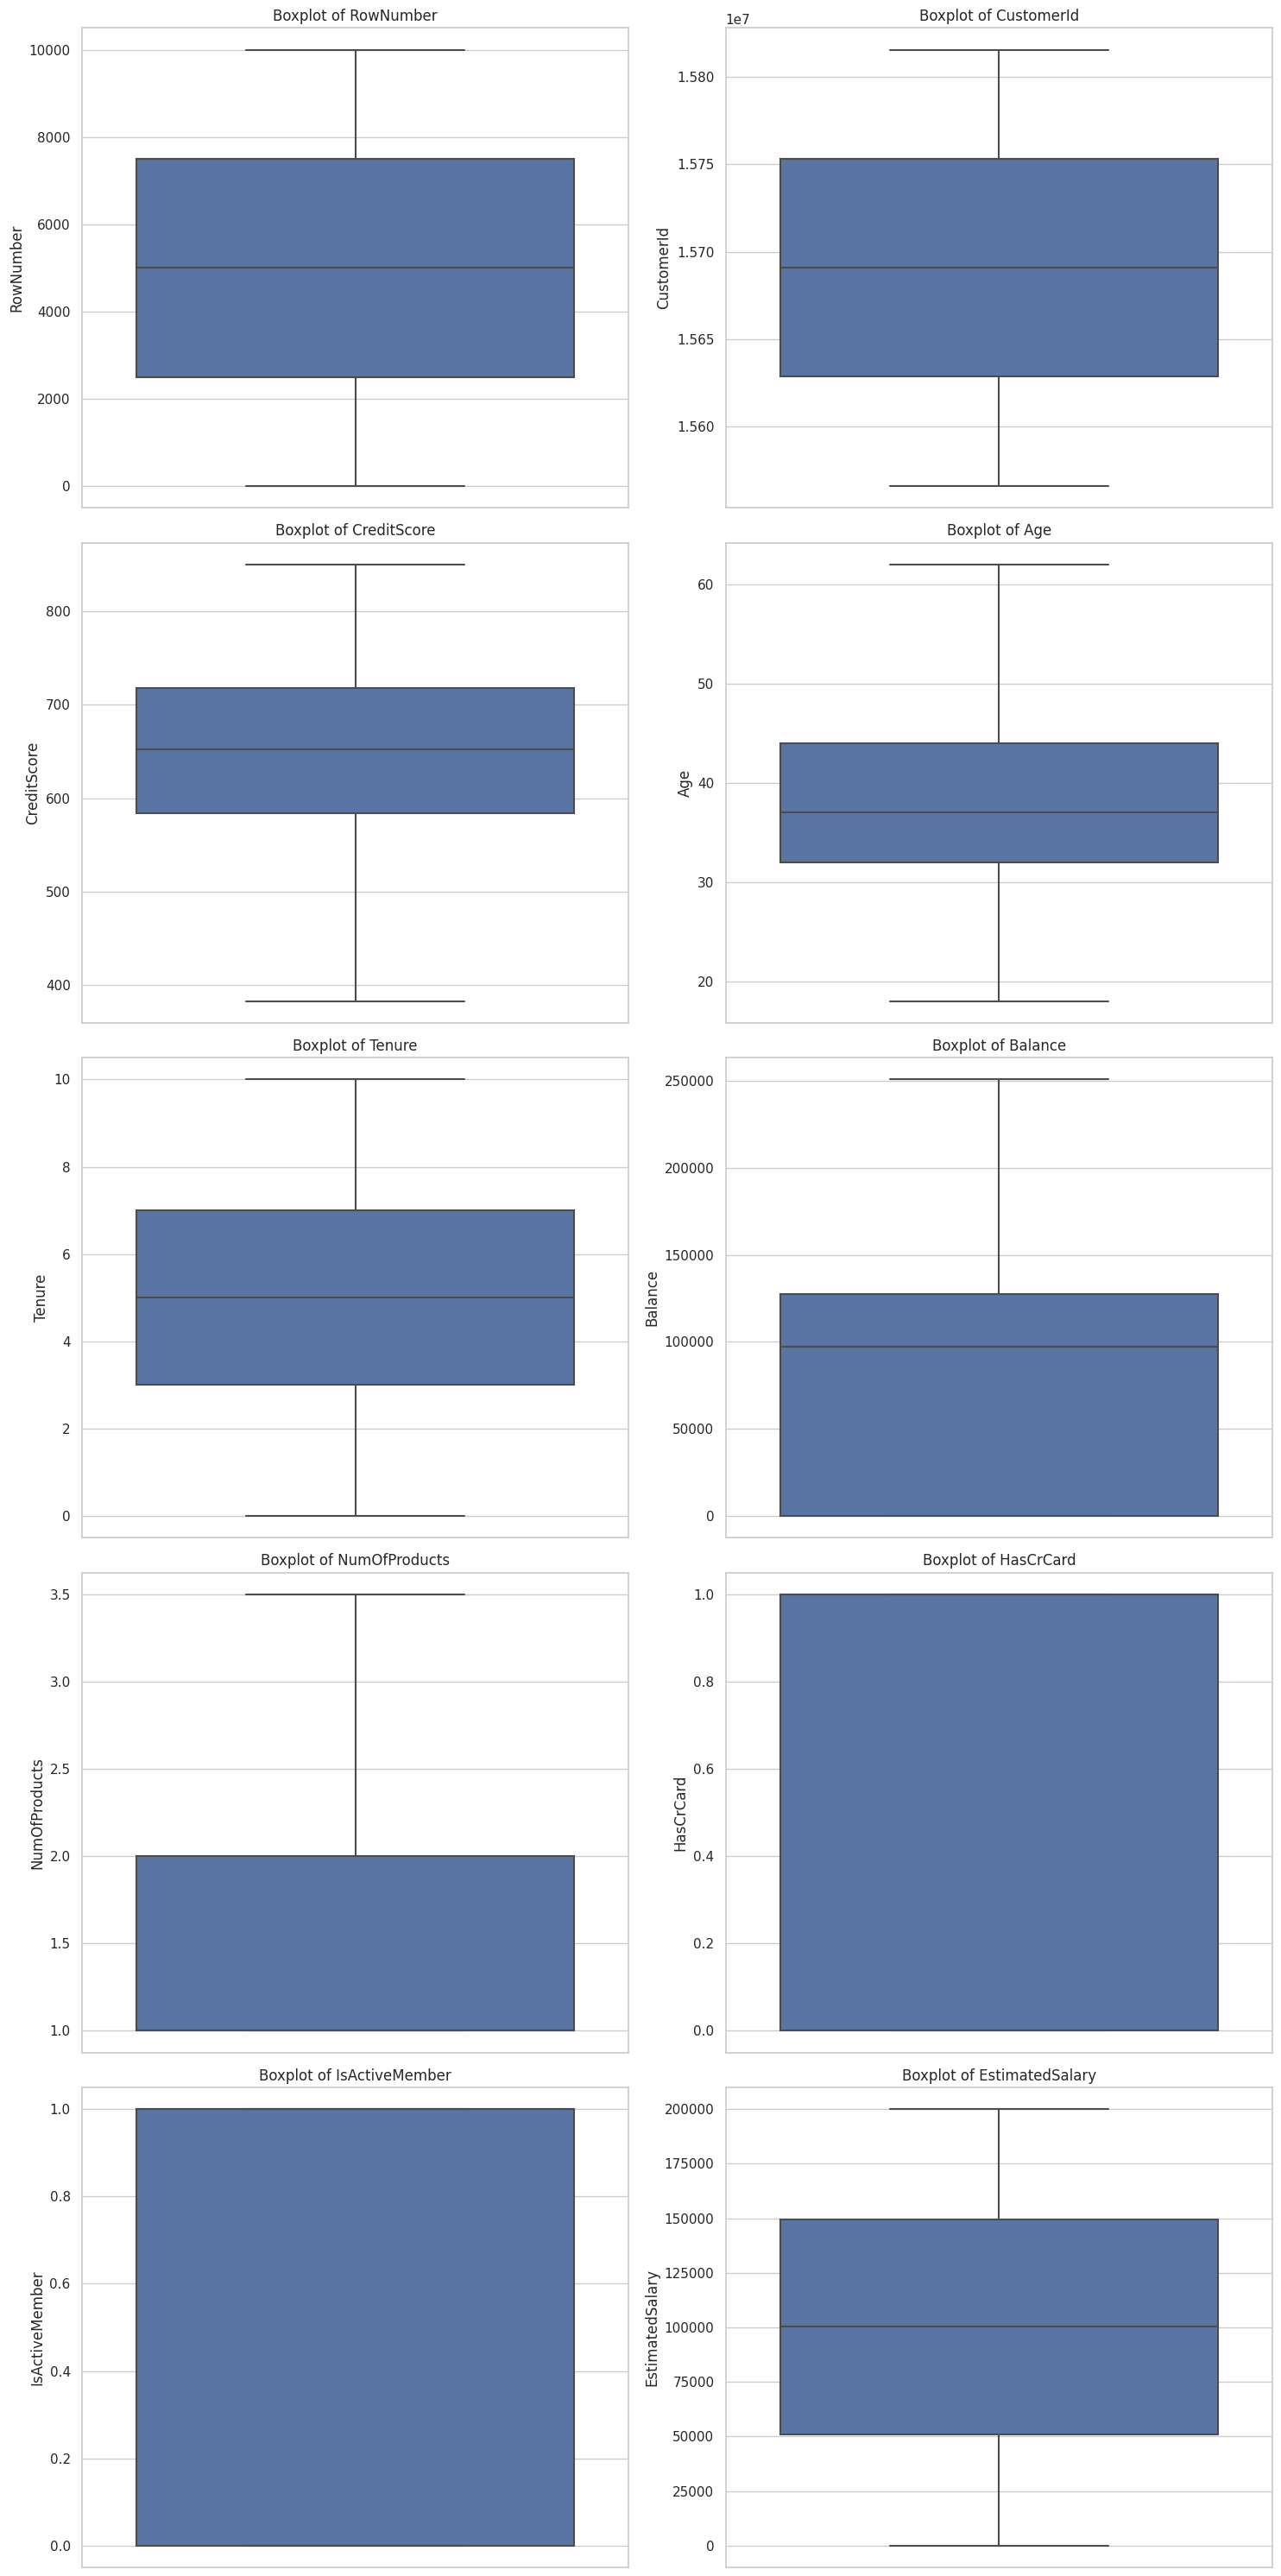

In [30]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(nrows=(len(numeric_columns) + 1) // 2, ncols=2, figsize=(15, len(numeric_columns) * 3))

axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(data=df, y=column, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel('')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [31]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)
df.head()

CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0        619.0    France  Female  42.0       2       0.00            1.0   
1        608.0     Spain  Female  41.0       1   83807.86            1.0   
2        502.0    France  Female  42.0       8  159660.80            3.0   
3        699.0    France  Female  39.0       1       0.00            2.0   
4        850.0     Spain  Female  43.0       2  125510.82            1.0   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited AgeGroup  
0          1               1        101348.88       1    40-50  
1          0               1        112542.58       0    40-50  
2          1               0        113931.57       1    40-50  
3          0               0         93826.63       0    30-40  
4          1               1         79084.10       0    40-50

In [32]:
df.shape

(10000, 12)

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Exited']), df['Exited'],test_size=0.2,random_state=42)

In [35]:
X_train.head()

CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
9254        686.0    France    Male  32.0       6       0.00            2.0   
1561        632.0   Germany    Male  42.0       4  119624.60            2.0   
1670        559.0     Spain    Male  24.0       3  114739.92            1.0   
6087        561.0    France  Female  27.0       9  135637.00            1.0   
6669        517.0    France    Male  56.0       9  142147.32            1.0   

      HasCrCard  IsActiveMember  EstimatedSalary AgeGroup  
9254          1               1        179093.26    30-40  
1561          1               1        195978.86    40-50  
1670          1               0         85891.02     0-30  
6087          1               0        153080.40     0-30  
6669          0               0         39488.04    50-60

In [36]:
numerical_columns = [0, 3, 4, 5, 6, 7, 8, 9]
nominal_columns = [1, 2]
ordinal_columns = [10]

In [37]:
handle_numerical = Pipeline(steps=[
    ('impyte', SimpleImputer(strategy='mean')),
    ('scale', MinMaxScaler())
])

In [38]:
handle_nominal = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder())
])

In [39]:
handle_ordinal = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder())
])

In [40]:
preprocessing = ColumnTransformer(transformers=[
    ('numerical', handle_numerical, numerical_columns),
    ('ordinal', handle_ordinal, ordinal_columns),
    ('nominal', handle_nominal, nominal_columns)
], remainder='passthrough')

In [41]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [42]:
adasyn = ADASYN(random_state=42)

In [43]:
pipe_adasyn = Pipeline(steps=[
    ('preprocessing', preprocessing), 
    ('smote', adasyn)])

In [44]:
X_train_resampled, y_train_resampled = pipe_adasyn.fit_resample(X_train, y_train)

In [45]:
X_test_preprocessed = pipe_adasyn.named_steps['preprocessing'].transform(X_test)

In [46]:
class_weights = {0: 1, 1: 3}

In [47]:
model_dt = DecisionTreeClassifier(class_weight=class_weights)
model_dt.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(class_weight={0: 1, 1: 3})

In [48]:
y_pred_dt = model_dt.predict(X_test_preprocessed)

In [49]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1607
           1       0.44      0.52      0.48       393

    accuracy                           0.78      2000
   macro avg       0.66      0.68      0.67      2000
weighted avg       0.79      0.78      0.78      2000



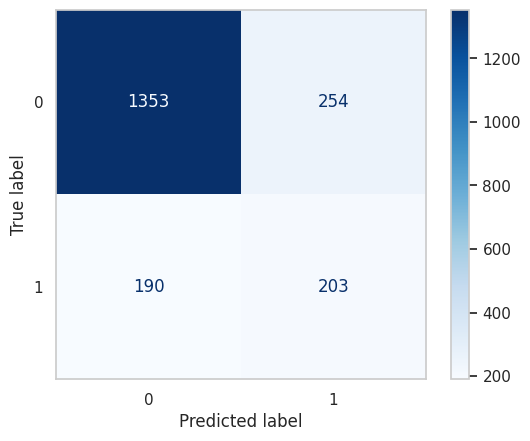

In [50]:
unique_classes = np.unique(np.concatenate([y_test, y_pred_dt]))
cm = confusion_matrix(y_test, y_pred_dt, labels=unique_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_classes)
fig, ax = plt.subplots()
disp.plot(cmap='Blues', ax=ax)
ax.grid(False)
plt.show()